## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score


In [3]:
df=pd.read_csv('C:\\Users\\ritik\\Downloads\\placement.csv')

## Problem Statement

To predict student package based on acdmic parameters

Pridiction is based on the simple linear regression

## Viewing the data 

In [4]:
df.sample()

,cgpa,package
79,7.18,3.0


## basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Missing values

In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

## Checking for linearity :Assumption 1

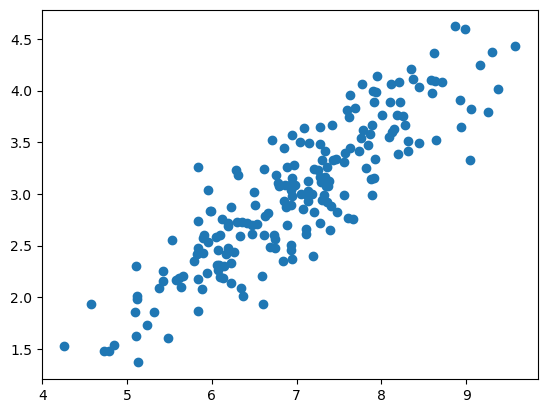

In [7]:
plt.scatter(df["cgpa"],df["package"]);

Checking the distribution of each columns

C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


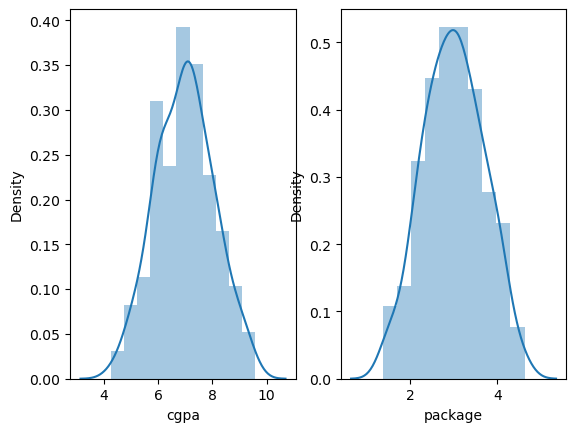

In [8]:
col=1
import pylab
for i in df.columns:
    if col<3:
        plt.subplot(1,2,col);
        sns.distplot(df[i])
        col=col+1

## qq plot

## Corelation

In [9]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


## Heatmap

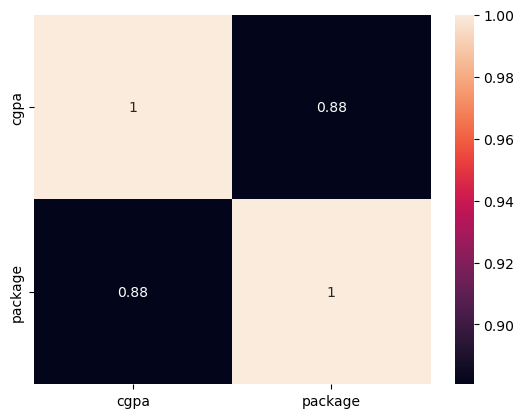

In [10]:
sns.heatmap(df.corr(),annot=True);

## statstical summary

In [11]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


## Segeration of data into inputs as x and target as y as follow :


In [12]:
x=df[["cgpa"]]
y=df["package"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## Checkig the data shape

In [14]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160,)


In [15]:
print(x_test.shape)
print(y_test.shape)

(40, 1)
(40,)


## Model Creation

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)  # training data

LinearRegression()

In [18]:
lr.coef_

array([0.57425647])

In [19]:
lr.intercept_

-1.0270069374542108

In [20]:
##y=mx+b
##y=0.578*x+-1.11

## Model Evaluation

In [21]:
y_pred=lr.predict(x_test)

In [22]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [23]:
mse1=mse(y_test,y_pred)
mse1

0.08417638361329656

In [24]:
mae(y_test,y_pred)

0.23150985393278373

In [25]:
rmse=np.sqrt(mse1)
rmse

0.2901316659954521

In [28]:
r2=r2_score(y_test,y_pred)
r2

0.7730984312051673

Text(0, 0.5, 'Package in LPA')

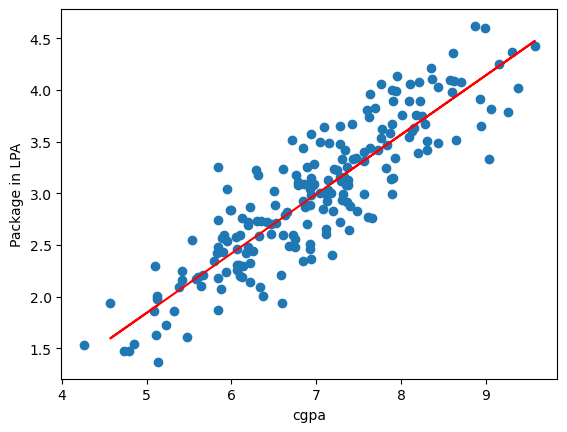

In [27]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train["cgpa"],lr.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package in LPA')


In [29]:
adj=1-((1-r2)*(40-1))/(40-2-1)
adj

0.7608334815405817

In [39]:
n_house=np.random.randint(0,10,200)
df["n_house"]=n_house

In [42]:
temp=np.random.randint(0,55,200)
df["temp"]=temp

In [43]:
df.head(10)

,cgpa,package,n_house,temp
0,6.89,3.26,0,33
1,5.12,1.98,7,19
2,7.82,3.25,2,29
3,7.42,3.67,5,41
4,6.94,3.57,2,53
5,7.89,2.99,5,25
6,6.73,2.60,9,34
7,6.75,2.48,3,54
8,6.09,2.31,2,40
9,8.31,3.51,9,45


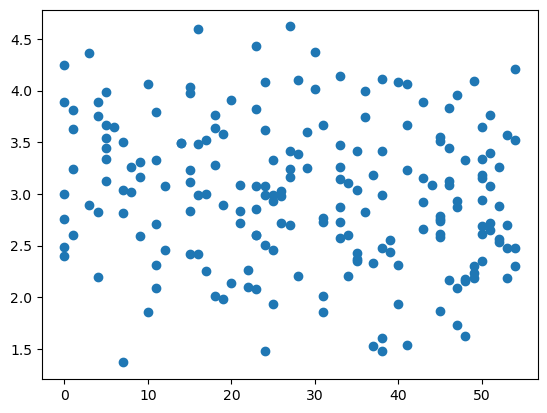

In [44]:
plt.scatter(df["temp"],df["package"])

In [45]:
df.drop(columns=["n_house"],inplace=True)

In [46]:
x=df[["cgpa","temp"]]
y=df["package"]

In [47]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=42)

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(x_train,y_train) 

LinearRegression()

In [51]:
r2=r2_score(y_test,y_pred)
r2

0.7730984312051673

In [52]:
adj=1-((1-r2)*(40-1))/(40-2-1)
adj

0.7608334815405817